# Exploratory Data Analysis (EDA)

Nesta etapa do projeto, entramos na fase de **Exploratory Data Analysis (EDA)** dentro da metodologia **CRISP-DM**.

## Objetivos da fase de EDA

Os principais objetivos desta fase são:

- Explorar estatisticamente o dataset preparado (`data/processed`)
- Identificar padrões, tendências e distribuições relevantes
- Analisar relações entre variáveis (ex.: cargos, salários, tempo de serviço)
- Detectar possíveis outliers ou comportamentos atípicos
- Gerar hipóteses analíticas que poderão ser aprofundadas posteriormente
- Produzir insights compreensíveis tanto para:
  - Público geral (cidadãos)
  - Recrutadores e profissionais da área de dados

### Papel da EDA neste projeto

A EDA é a ponte entre os **dados tratados** e a **comunicação dos resultados**.

Os achados desta etapa servirão de base para:

- Construção de narrativas analíticas
- Visualizações interativas
- Publicação de resultados em dashboards (ex.: Streamlit)
- Demonstração de habilidades analíticas em portfólio profissional

Nenhuma modelagem preditiva será realizada neste momento.  
O foco está em **compreender profundamente os dados** antes de qualquer etapa avançada.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Definindo quantas colunas o pandas irá exibir
pd.set_option("display.max_columns", 100)

# Definindo como números float serão exibidos (2 casas decimais)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

In [3]:
df_serv = pd.read_csv("../data/processed/servidores_municipais_final.csv", sep=",", encoding="utf-8")

In [4]:
df_serv.head()

,id_servidor,sexo,cargo,categoria_cargo,tipo_pagamento,proventos,descontos,liquido,carga_horaria_semanal,data_admissao,data_desligamento,status_servidor,mes
0,fd384acafe2d04b4525169770984b83246828743f0e8aa...,M,AJUDANTE DE SERVICOS DIVERSOS,operacional,vale_alimentacao,"1,000.00",0.00,"1,000.00",40,2006-06-19,NaN,ATIVO,jan
1,379ea2db2ce8b452ca96cbd1ee182fbda32dd884195931...,M,MOTORISTA,operacional,vale_alimentacao,"1,000.00",0.00,"1,000.00",40,2012-08-13,NaN,ATIVO,jan
2,379ea2db2ce8b452ca96cbd1ee182fbda32dd884195931...,M,MOTORISTA,operacional,folha_mensal,"3,675.13",412.48,"3,262.65",40,2012-08-13,NaN,ATIVO,jan
3,79d7249fd3bb08e95ddf2596765773e22927a0113cf95d...,M,OFICIAL ADMINISTRATIVO,administrativo,folha_mensal,"6,257.37","1,459.90","4,797.47",35,2006-03-20,NaN,ATIVO,jan
4,79d7249fd3bb08e95ddf2596765773e22927a0113cf95d...,M,OFICIAL ADMINISTRATIVO,administrativo,vale_alimentacao,"1,000.00",0.00,"1,000.00",35,2006-03-20,NaN,ATIVO,jan


In [5]:
df_serv.tail()

,id_servidor,sexo,cargo,categoria_cargo,tipo_pagamento,proventos,descontos,liquido,carga_horaria_semanal,data_admissao,data_desligamento,status_servidor,mes
23992,f061d46cb3dc7c55a5d2d891d6d6105644bc10d7b301e8...,F,AJUDANTE DE SERVICOS DIVERSOS,operacional,folha_mensal,"2,299.65",321.95,"1,977.70",40,2013-04-01,NaN,ATIVO,dez
23993,3e5ceb7467aab950efa7a34a6a8806606a3904629ad95b...,F,AJUDANTE DE SERVICOS DIVERSOS,operacional,Fechamento 13º Salário,"2,298.25","1,132.26","1,165.99",44,2009-12-21,NaN,ATIVO,dez
23994,3e5ceb7467aab950efa7a34a6a8806606a3904629ad95b...,F,AJUDANTE DE SERVICOS DIVERSOS,operacional,vale_alimentacao,"1,000.00",0.00,"1,000.00",44,2009-12-21,NaN,ATIVO,dez
23995,10a60cdde464dbcccbef4f84fb09db4e4a5642708caeae...,F,MERENDEIRA,educacao,folha_mensal,"3,109.45",369.42,"2,740.03",40,2006-02-13,NaN,ATIVO,dez
23996,3c40f1de7d5963c46fc43919f6783f5c21c5c633718e2e...,F,PROFESSOR DE EDUCAÇÃO BÁSICA I - PEB I,educacao,Fechamento 13º Salário,"4,483.67","3,061.64","1,422.03",30,2016-02-03,NaN,ATIVO,dez


## Visão Geral dos Dados

Nesta etapa inicial da Análise Exploratória de Dados (EDA), é apresentada uma visão geral do conjunto de dados que será utilizado nas análises subsequentes.

In [6]:
df_serv.shape

(23997, 13)

- O dataset tem 23997 linhas e 13 colunas

In [7]:
df_serv["id_servidor"].nunique()

980

- Durante o ano de 2025 a Prefeitura Municipal de Santa Rita do Passa Quatro/SP teve 980 servidores.

In [8]:
df_serv["mes"].unique()

array(['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set',
       'out', 'nov', 'dez'], dtype=object)

- A análise cobre todos os meses referentes ao ano de 2025

In [9]:
df_serv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23997 entries, 0 to 23996
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_servidor            23997 non-null  object 
 1   sexo                   23997 non-null  object 
 2   cargo                  23997 non-null  object 
 3   categoria_cargo        23997 non-null  object 
 4   tipo_pagamento         23997 non-null  object 
 5   proventos              23919 non-null  float64
 6   descontos              23997 non-null  float64
 7   liquido                23997 non-null  float64
 8   carga_horaria_semanal  23997 non-null  int64  
 9   data_admissao          23997 non-null  object 
 10  data_desligamento      157 non-null    object 
 11  status_servidor        23997 non-null  object 
 12  mes                    23997 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 2.4+ MB


### Dimensão do dataset
O dataset é composto por **23997 registros** e **12 colunas**, representando pagamentos realizados a servidores públicos ao longo dos meses analisados.

### Servidores únicos
Foram identificados **980 servidores únicos**, considerando o identificador `id_servidor`.  
É importante destacar que um mesmo servidor pode aparecer em múltiplos registros, uma vez que os dados estão organizados por período de pagamento.

### Período de referência
Os dados contemplam os seguintes meses de referência:

Janeiro, Fevereiro, Março, Abril, Maio, Junho, Julho, Agosto, Setembro, Outubro, Novembro e Dezembro

Essa distribuição mensal permite análises temporais sobre a evolução da folha de pagamento ao longo do tempo.

### Estrutura dos dados
O dataset consolidado contém informações relacionadas a:

- Identificação do servidor
- Características funcionais (cargo, categoria e tipo de contrato)
- Informações temporais (data de admissão e desligamento)
- Dados financeiros (proventos, descontos e salário líquido)
- Carga horária semanal

A estrutura atual do dataset está preparada para análises descritivas, comparativas e temporais, que serão exploradas nas próximas etapas da EDA.


## Tratando a coluna `data_admissao`, `data_desligamento` e `mes`


Embora o campo `data_admissao` e `data_desligamento` tenham sido previamente convertidos para data durante a preparação dos dados, a exportação em CSV não preserva os tipos de dados. Portanto, as colunas de data são analisadas novamente de forma explícita após o carregamento do conjunto de dados processado.

In [10]:
df_serv["data_admissao"] = pd.to_datetime(df_serv["data_admissao"], errors="coerce")

In [11]:
df_serv["data_desligamento"] = pd.to_datetime(df_serv["data_desligamento"], errors="coerce")

In [18]:
ordem_meses = [
    "jan", "fev", "mar", "abr", "mai", "jun",
    "jul", "ago", "set", "out", "nov", "dez"
]

df_serv["mes"] = pd.Categorical(
    df_serv["mes"],
    categories=ordem_meses,
    ordered=True
)

In [56]:
df_serv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23997 entries, 0 to 23996
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_servidor            23997 non-null  object        
 1   sexo                   23997 non-null  object        
 2   cargo                  23997 non-null  object        
 3   categoria_cargo        23997 non-null  object        
 4   tipo_pagamento         23997 non-null  object        
 5   proventos              23919 non-null  float64       
 6   descontos              23997 non-null  float64       
 7   liquido                23997 non-null  float64       
 8   carga_horaria_semanal  23997 non-null  int64         
 9   data_admissao          23997 non-null  datetime64[ns]
 10  data_desligamento      157 non-null    datetime64[ns]
 11  status_servidor        23997 non-null  object        
 12  mes                    23997 non-null  category      
dtypes

**Observação sobre campos de data**

A coluna `data_desligamento` apresenta majoritariamente valores ausentes (`NaT`), o que indica que a maioria dos servidores encontra-se em exercício ativo. No entanto, alguns registros possuem data de desligamento preenchida.

Para tornar essa informação mais explícita e facilitar as análises, foi criada a coluna `status_servidor`, que classifica o servidor como:

- **ATIVO**: quando `data_desligamento` está ausente (`NaT`)
- **DESLIGADO**: quando existe uma data válida em `data_desligamento`

## Panorama Geral da Força de Trabalho

### 1.1 Snapshot Atual - Dezembro/2025

**Objetivo:** Obter uma visão geral do quadro de servidores municipais ao final de 2025, incluindo:
- Total de servidores ativos
- Total de desligamentos no ano
- Distribuição por gênero
- Razão masculino/feminino

In [6]:
# 1.1 - Snapshot Atual: Servidores Ativos e Desligados

# Filtrando dados de dezembro
df_dez = df_serv[df_serv['mes'] == 'dez']

# Total de servidores únicos ativos em dezembro
total_ativos = df_dez[df_dez['status_servidor'] == 'ATIVO']['id_servidor'].nunique()

# Total de servidores únicos desligados ao longo de 2025
total_desligados = df_serv[df_serv['status_servidor'] == 'DESLIGADO']['id_servidor'].nunique()

# Distribuição por gênero (apenas ativos)
df_ativos_unicos = df_dez[df_dez['status_servidor'] == 'ATIVO'].drop_duplicates(subset='id_servidor')

dist_genero = df_ativos_unicos['sexo'].value_counts()
dist_genero_pct = df_ativos_unicos['sexo'].value_counts(normalize=True) * 100

# Razão M/F
razao_mf = dist_genero.get('M', 0) / dist_genero.get('F', 0) if dist_genero.get('F', 0) > 0 else 0

# Exibindo resultados
print("=" * 60)
print("SNAPSHOT DA FORÇA DE TRABALHO - DEZEMBRO/2025")
print("=" * 60)
print(f"\n✓ Servidores ATIVOS: {total_ativos:,}")
print(f"✓ Servidores DESLIGADOS em 2025: {total_desligados:,}")
print(f"\n{'-' * 60}")
print("DISTRIBUIÇÃO POR GÊNERO (Servidores Ativos)")
print("-" * 60)
print(f"\nFeminino: {dist_genero.get('F', 0):,} ({dist_genero_pct.get('F', 0):.1f}%)")
print(f"Masculino: {dist_genero.get('M', 0):,} ({dist_genero_pct.get('M', 0):.1f}%)")
print(f"\nRazão Masculino/Feminino: {razao_mf:.2f}")

SNAPSHOT DA FORÇA DE TRABALHO - DEZEMBRO/2025

✓ Servidores ATIVOS: 858
✓ Servidores DESLIGADOS em 2025: 149

------------------------------------------------------------
DISTRIBUIÇÃO POR GÊNERO (Servidores Ativos)
------------------------------------------------------------

Feminino: 508 (59.2%)
Masculino: 350 (40.8%)

Razão Masculino/Feminino: 0.69


### Resultados - Snapshot Dezembro/2025

**Dados obtidos:**
- Servidores ativos: 858
- Servidores desligados em 2025: 149
- Distribuição por gênero:
  - Feminino: 508 (59.2%)
  - Masculino: 350 (40.8%)
- Razão M/F: 0.69

**Insights:**

1. **Força de trabalho predominantemente feminina:** O quadro de servidores municipais é composto majoritariamente por mulheres (59.2%), com aproximadamente 3 mulheres para cada 2 homens (razão 0.69). Isso pode refletir a composição de áreas como Educação e Saúde, que tradicionalmente empregam mais mulheres.

2. **Taxa de turnover moderada:** Dos 1.007 servidores que passaram pela prefeitura em 2025, 149 foram desligados (14.8%), mantendo 858 ativos ao final do ano. Essa taxa sugere relativa estabilidade no quadro funcional.

3. **Quadro estável:** Com 85.2% dos servidores permanecendo ativos, o município demonstra capacidade de retenção de talentos, o que é positivo para continuidade dos serviços públicos.

4. **Contexto para próximas análises:** Será importante verificar se a predominância feminina se distribui uniformemente entre todas as categorias de cargo ou se concentra em áreas específicas (próxima etapa da análise).

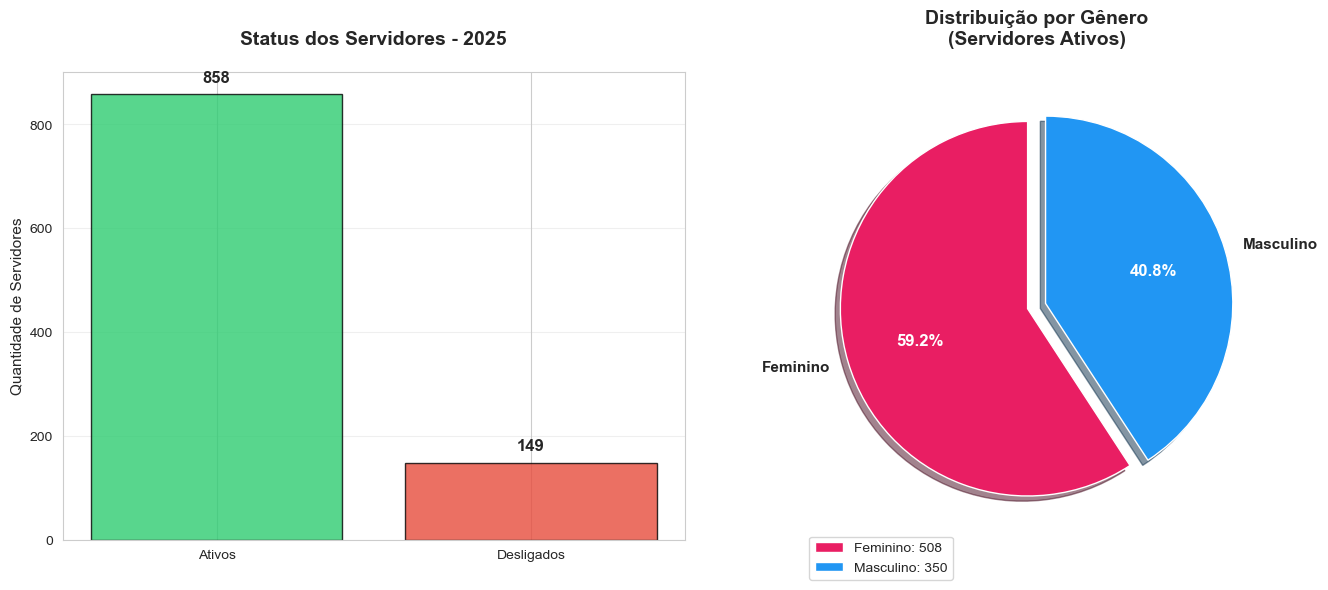


RESUMO ESTATÍSTICO
Total de servidores no município: 1,007
Taxa de ativos: 85.2%
Taxa de desligamento: 14.8%


In [7]:
# Configurando estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Criando subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ===== GRÁFICO 1: Status dos Servidores =====
status_data = pd.DataFrame({
    'Status': ['Ativos', 'Desligados'],
    'Quantidade': [total_ativos, total_desligados]
})

colors_status = ['#2ecc71', '#e74c3c']
axes[0].bar(status_data['Status'], status_data['Quantidade'], color=colors_status, alpha=0.8, edgecolor='black')
axes[0].set_title('Status dos Servidores - 2025', fontsize=14, fontweight='bold', pad=20)
axes[0].set_ylabel('Quantidade de Servidores', fontsize=11)
axes[0].set_xlabel('')

# Adicionando valores nas barras
for i, v in enumerate(status_data['Quantidade']):
    axes[0].text(i, v + (max(status_data['Quantidade']) * 0.02), f'{v:,}', 
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

axes[0].grid(axis='y', alpha=0.3)


# ===== GRÁFICO 2: Distribuição por Gênero (Ativos) =====
genero_data = pd.DataFrame({
    'Gênero': ['Feminino', 'Masculino'],
    'Quantidade': [dist_genero.get('F', 0), dist_genero.get('M', 0)],
    'Percentual': [dist_genero_pct.get('F', 0), dist_genero_pct.get('M', 0)]
})

colors_gender = ['#e91e63', '#2196f3']
wedges, texts, autotexts = axes[1].pie(
    genero_data['Quantidade'], 
    labels=genero_data['Gênero'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_gender,
    explode=(0.05, 0.05),
    shadow=True
)

# Melhorando a aparência do texto
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

for text in texts:
    text.set_fontsize(11)
    text.set_fontweight('bold')

axes[1].set_title('Distribuição por Gênero\n(Servidores Ativos)', 
                  fontsize=14, fontweight='bold', pad=20)

# Adicionando legenda com números absolutos
legend_labels = [f'{g}: {q:,}' for g, q in zip(genero_data['Gênero'], genero_data['Quantidade'])]
axes[1].legend(legend_labels, loc='lower left', bbox_to_anchor=(0, -0.1), fontsize=10)

plt.tight_layout()
plt.show()

# Exibindo informações adicionais
print(f"\n{'=' * 60}")
print("RESUMO ESTATÍSTICO")
print('=' * 60)
print(f"Total de servidores no município: {total_ativos + total_desligados:,}")
print(f"Taxa de ativos: {(total_ativos / (total_ativos + total_desligados) * 100):.1f}%")
print(f"Taxa de desligamento: {(total_desligados / (total_ativos + total_desligados) * 100):.1f}%")

---

## 1.2 Evolução do Quadro de Servidores ao Longo de 2025

**Objetivo:** Analisar a evolução temporal do número de servidores ativos mês a mês para identificar:
- Tendências de crescimento ou redução do quadro
- Meses com maior/menor contingente
- Padrões sazonais de contratação/desligamento

**Metodologia:** Contagem de servidores únicos ativos por mês, considerando apenas um registro por servidor em cada período.

In [9]:
# Definindo ordem dos meses
meses_ordem = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 
               'jul', 'ago', 'set', 'out', 'nov', 'dez']

# Contando servidores ativos únicos por mês
evolucao_mensal = []

for mes in meses_ordem:
    df_mes = df_serv[df_serv['mes'] == mes]
    ativos_mes = df_mes[df_mes['status_servidor'] == 'ATIVO']['id_servidor'].nunique()
    evolucao_mensal.append({
        'mes': mes,
        'servidores_ativos': ativos_mes
    })

df_evolucao = pd.DataFrame(evolucao_mensal)

# Calculando variações
df_evolucao['variacao_abs'] = df_evolucao['servidores_ativos'].diff()
df_evolucao['variacao_pct'] = df_evolucao['servidores_ativos'].pct_change() * 100

# Identificando extremos
mes_maior = df_evolucao.loc[df_evolucao['servidores_ativos'].idxmax()]
mes_menor = df_evolucao.loc[df_evolucao['servidores_ativos'].idxmin()]
variacao_total = df_evolucao.iloc[-1]['servidores_ativos'] - df_evolucao.iloc[0]['servidores_ativos']
variacao_total_pct = (variacao_total / df_evolucao.iloc[0]['servidores_ativos']) * 100

# Exibindo tabela
print("=" * 80)
print("EVOLUÇÃO MENSAL DO QUADRO DE SERVIDORES - 2025")
print("=" * 80)
print(df_evolucao.to_string(index=False))

print(f"\n{'-' * 80}")
print("RESUMO DA EVOLUÇÃO ANUAL")
print("-" * 80)
print(f"Mês com MAIOR contingente: {mes_maior['mes'].upper()} ({mes_maior['servidores_ativos']:,} servidores)")
print(f"Mês com MENOR contingente: {mes_menor['mes'].upper()} ({mes_menor['servidores_ativos']:,} servidores)")
print(f"Variação total (jan→dez): {variacao_total:+,} servidores ({variacao_total_pct:+.1f}%)")
print(f"Amplitude: {mes_maior['servidores_ativos'] - mes_menor['servidores_ativos']:,} servidores")

EVOLUÇÃO MENSAL DO QUADRO DE SERVIDORES - 2025
mes  servidores_ativos  variacao_abs  variacao_pct
jan                850           NaN           NaN
fev                909         59.00          6.94
mar                910          1.00          0.11
abr                916          6.00          0.66
mai                911         -5.00         -0.55
jun                902         -9.00         -0.99
jul                903          1.00          0.11
ago                907          4.00          0.44
set                909          2.00          0.22
out                910          1.00          0.11
nov                910          0.00          0.00
dez                858        -52.00         -5.71

--------------------------------------------------------------------------------
RESUMO DA EVOLUÇÃO ANUAL
--------------------------------------------------------------------------------
Mês com MAIOR contingente: ABR (916 servidores)
Mês com MENOR contingente: JAN (850 servidores)
Variaç

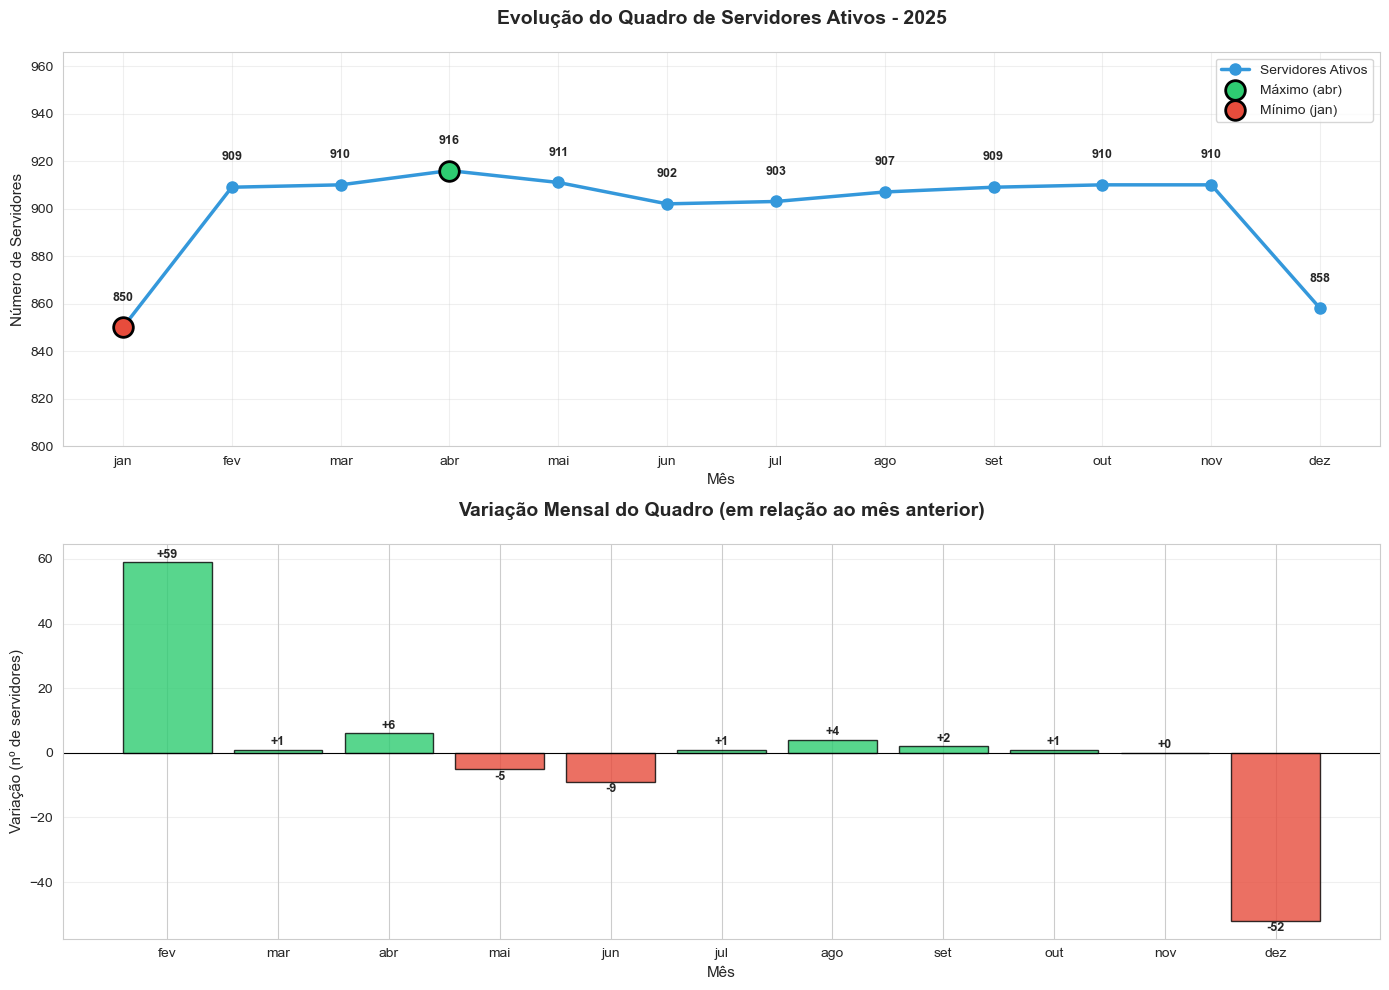

In [10]:
# Visualização da evolução temporal

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# ===== GRÁFICO 1: Linha do tempo - Servidores Ativos =====
axes[0].plot(df_evolucao['mes'], df_evolucao['servidores_ativos'], 
             marker='o', linewidth=2.5, markersize=8, color='#3498db', label='Servidores Ativos')

# Destacando máximo e mínimo
axes[0].scatter(mes_maior['mes'], mes_maior['servidores_ativos'], 
                color='#2ecc71', s=200, zorder=5, label=f'Máximo ({mes_maior["mes"]})', edgecolors='black', linewidths=2)
axes[0].scatter(mes_menor['mes'], mes_menor['servidores_ativos'], 
                color='#e74c3c', s=200, zorder=5, label=f'Mínimo ({mes_menor["mes"]})', edgecolors='black', linewidths=2)

# Adicionando valores em cada ponto
for idx, row in df_evolucao.iterrows():
    axes[0].text(row['mes'], row['servidores_ativos'] + 10, f"{row['servidores_ativos']:,}", 
                 ha='center', va='bottom', fontsize=9, fontweight='bold')

axes[0].set_title('Evolução do Quadro de Servidores Ativos - 2025', 
                  fontsize=14, fontweight='bold', pad=20)
axes[0].set_ylabel('Número de Servidores', fontsize=11)
axes[0].set_xlabel('Mês', fontsize=11)
axes[0].legend(loc='best', fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(df_evolucao['servidores_ativos'].min() - 50, 
                 df_evolucao['servidores_ativos'].max() + 50)


# ===== GRÁFICO 2: Variação mensal (barras) =====
cores_variacao = ['#2ecc71' if x >= 0 else '#e74c3c' for x in df_evolucao['variacao_abs'].fillna(0)]

axes[1].bar(df_evolucao['mes'][1:], df_evolucao['variacao_abs'][1:], 
            color=cores_variacao[1:], alpha=0.8, edgecolor='black')

# Linha zero
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# Adicionando valores nas barras
for idx, row in df_evolucao[1:].iterrows():
    if pd.notna(row['variacao_abs']):
        axes[1].text(row['mes'], row['variacao_abs'] + (0.5 if row['variacao_abs'] >= 0 else -0.5), 
                     f"{row['variacao_abs']:+.0f}", 
                     ha='center', va='bottom' if row['variacao_abs'] >= 0 else 'top', 
                     fontsize=9, fontweight='bold')

axes[1].set_title('Variação Mensal do Quadro (em relação ao mês anterior)', 
                  fontsize=14, fontweight='bold', pad=20)
axes[1].set_ylabel('Variação (nº de servidores)', fontsize=11)
axes[1].set_xlabel('Mês', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Resultados - Evolução Mensal do Quadro 2025

**Dados obtidos:**
- Mês com MAIOR contingente: **Abril** (916 servidores)
- Mês com MENOR contingente: **Janeiro** (850 servidores)
- Variação total (jan→dez): **+8 servidores (+0.9%)**
- Amplitude anual: **66 servidores**

**Padrões identificados:**

| Período | Movimento | Variação |
|---------|-----------|----------|
| Jan→Fev | Forte expansão | +59 servidores (+6.94%) |
| Fev→Abr | Crescimento moderado | +7 servidores |
| Mai→Jun | Redução | -14 servidores |
| Jul→Nov | Estabilização | Variações mínimas (0 a +4) |
| Nov→Dez | Queda acentuada | -52 servidores (-5.71%) |

**Insights:**

1. **Expansão no início do ano:** O quadro cresceu significativamente em fevereiro (+59 servidores), sugerindo um processo de contratação concentrado no início do ano, possivelmente relacionado ao planejamento orçamentário anual e início do ano letivo/administrativo.

2. **Pico em abril:** O município atingiu seu maior contingente em abril (916 servidores), estabilizando-se próximo a esse patamar até novembro (média de 908 servidores no período mar-nov).

3. **Estabilidade no meio do ano:** Entre julho e novembro, o quadro manteve-se praticamente estável (902-910 servidores), com variações mensais mínimas (≤4 servidores), indicando baixo turnover nesse período.

4. **Redução significativa em dezembro:** A queda de 52 servidores em dezembro (-5.71%) é atípica e merece investigação. Possíveis causas:
   - Aposentadorias programadas para fim de ano
   - Fim de contratos temporários
   - Exonerações administrativas
   - **Ação recomendada:** Analisar perfil dos desligados (categoria, tempo de casa, tipo de vínculo)

5. **Saldo anual positivo discreto:** Apesar das oscilações, o ano fechou com saldo positivo de apenas 8 servidores (+0.9%), indicando que a gestão manteve o dimensionamento do quadro relativamente estável, com reposições equilibrando os desligamentos ao longo do ano.

6. **Contexto para próximas análises:** Será importante verificar se essas movimentações estão distribuídas uniformemente entre as categorias ou se concentram em áreas específicas (Educação, Saúde, etc.).